In [1]:
# The code was removed by Watson Studio for sharing.

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [2]:
class_info_df = df_data_0
                

In [3]:

body = client_238dc423176344d29f7203f00e02e5d5.get_object(Bucket='mlproject-donotdelete-pr-qfouepob2svnah',Key='stage_2_detailed_class_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_1 = pd.read_csv(body)
df_data_1.head()


,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [4]:
train_labels_df  =df_data_1


In [18]:
!pip install pandas_profiling

In [7]:
class_train_df=class_info_df.merge(train_labels_df,left_on='patientId',right_on='patientId',how='inner')

In [20]:
import pandas_profiling as pdf
pdf.ProfileReport(class_train_df)

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: Us

In [8]:
from matplotlib import pyplot as plt
import seaborn as sn

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


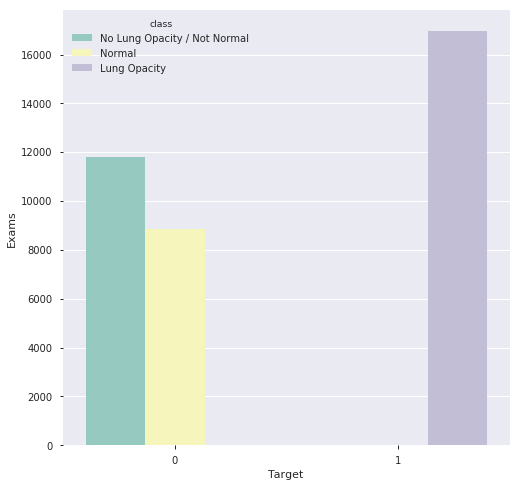

In [9]:
f,ax=plt.subplots(1,figsize=(8,8))
data=class_train_df.groupby('Target')['class'].value_counts()
df = pd.DataFrame(data={'Exams': data.values}, index=data.index).reset_index()
sn.barplot(data=df,ax=ax,palette='Set3',x = 'Target', y='Exams',hue='class')

In [49]:
from matplotlib.patches import Rectangle

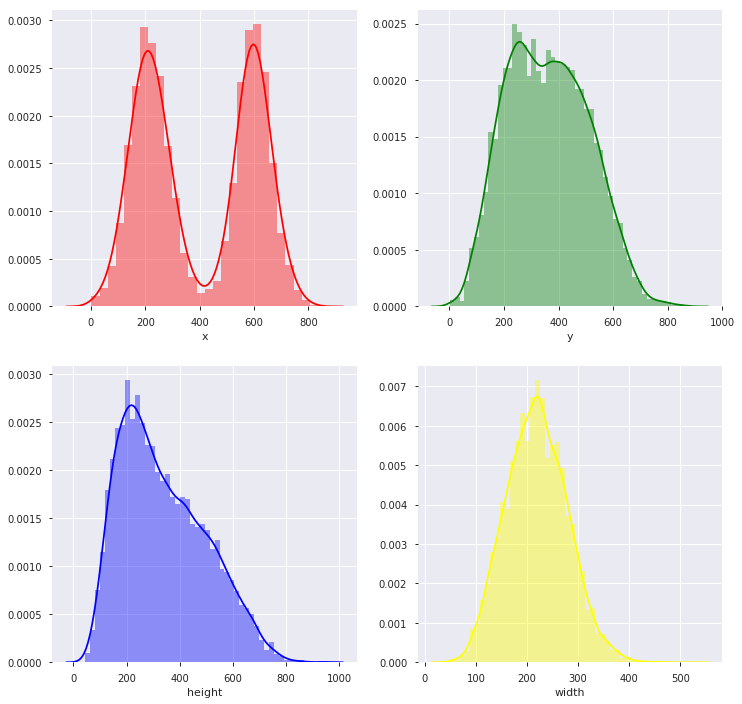

In [22]:
target1=class_train_df[class_train_df.Target==1]
x=[10,20,44,44]
#sn.set_style('whitegrid')
#plt.figure()
fig,ax=plt.subplots(2,2,figsize=(12,12))
sn.distplot(target1['x'],ax=ax[0,0],color="red")
#sn.distplot(x,ax=ax[0,0],color="red")
sn.distplot(target1['y'],ax=ax[0,1],color="green")
sn.distplot(target1['height'],ax=ax[1,0],color="blue")
sn.distplot(target1['width'],ax=ax[1,1],color="yellow")